Training data set: train.csv
Testing data set: train.csv
Importing data...
Import completed!
Choose operation:
1	Show Image.
2	Run Logistic Regression.
Press other key to exit!
1


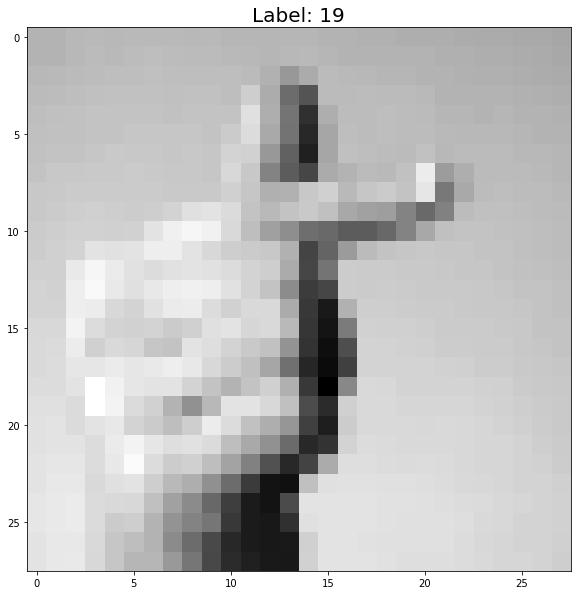

Choose operation:
1	Show Image.
2	Run Logistic Regression.
Press other key to exit!
2
Training data...


C:\Users\nguye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train completed


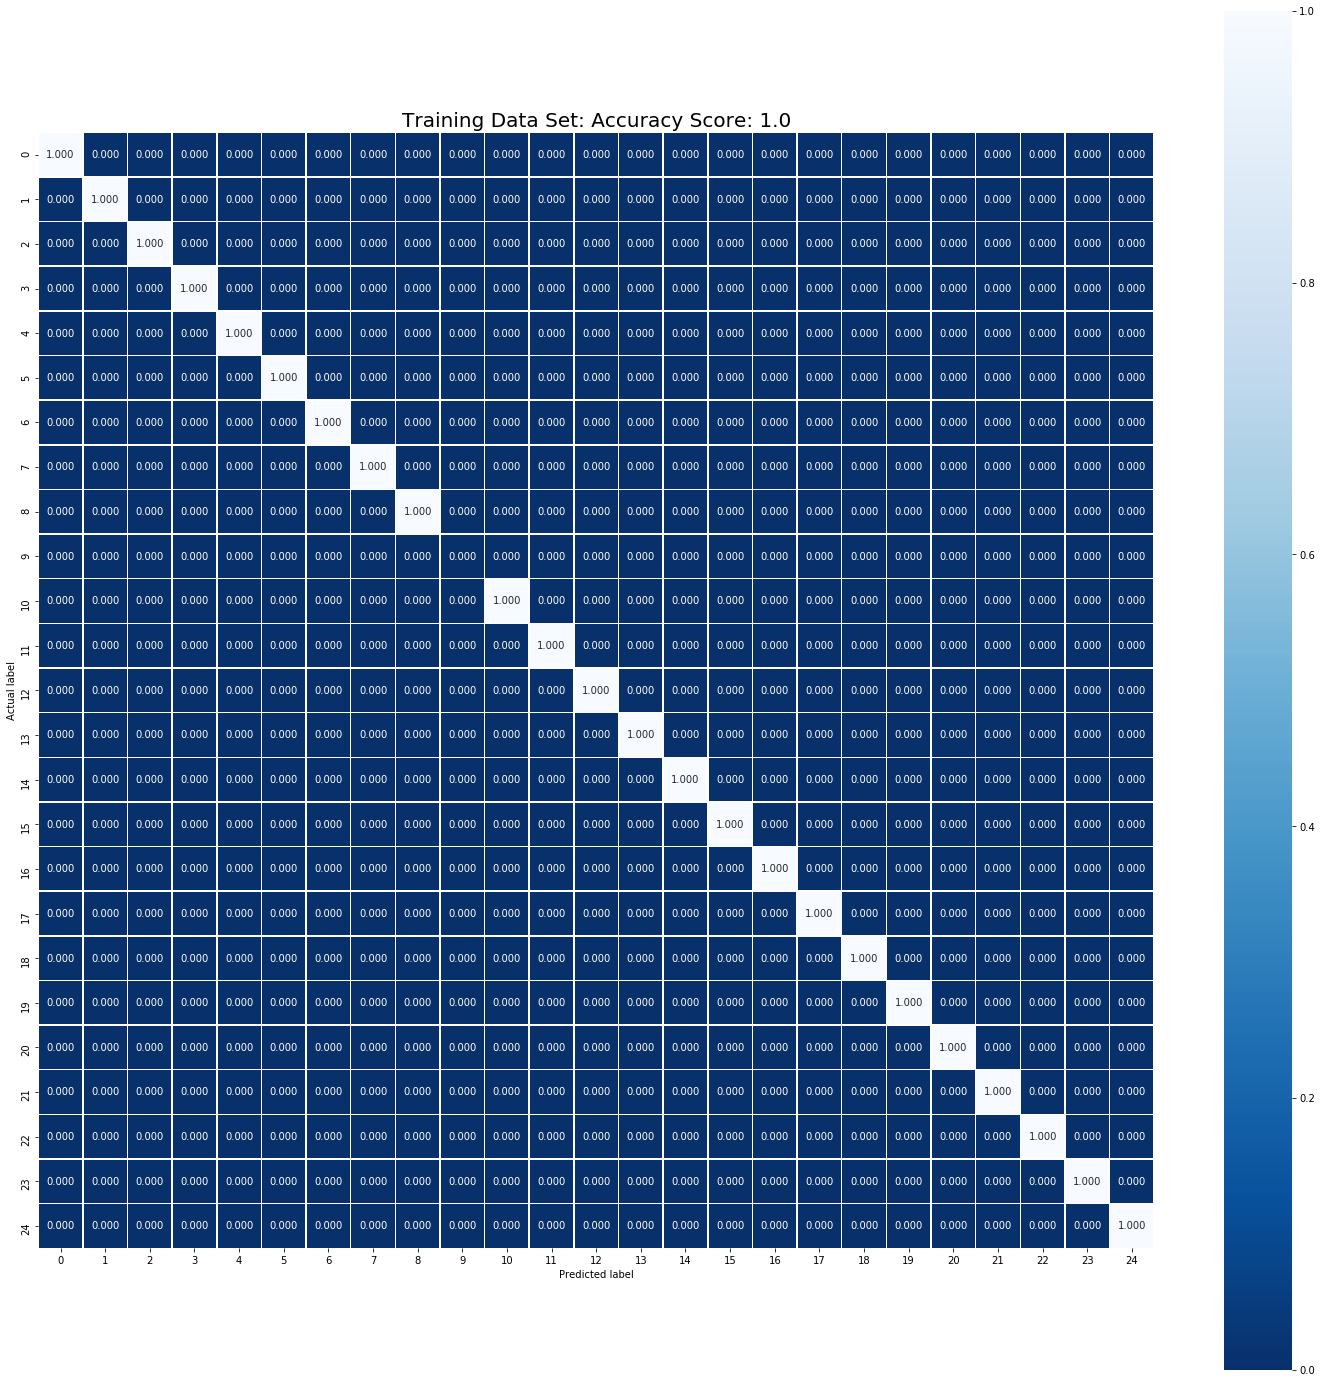

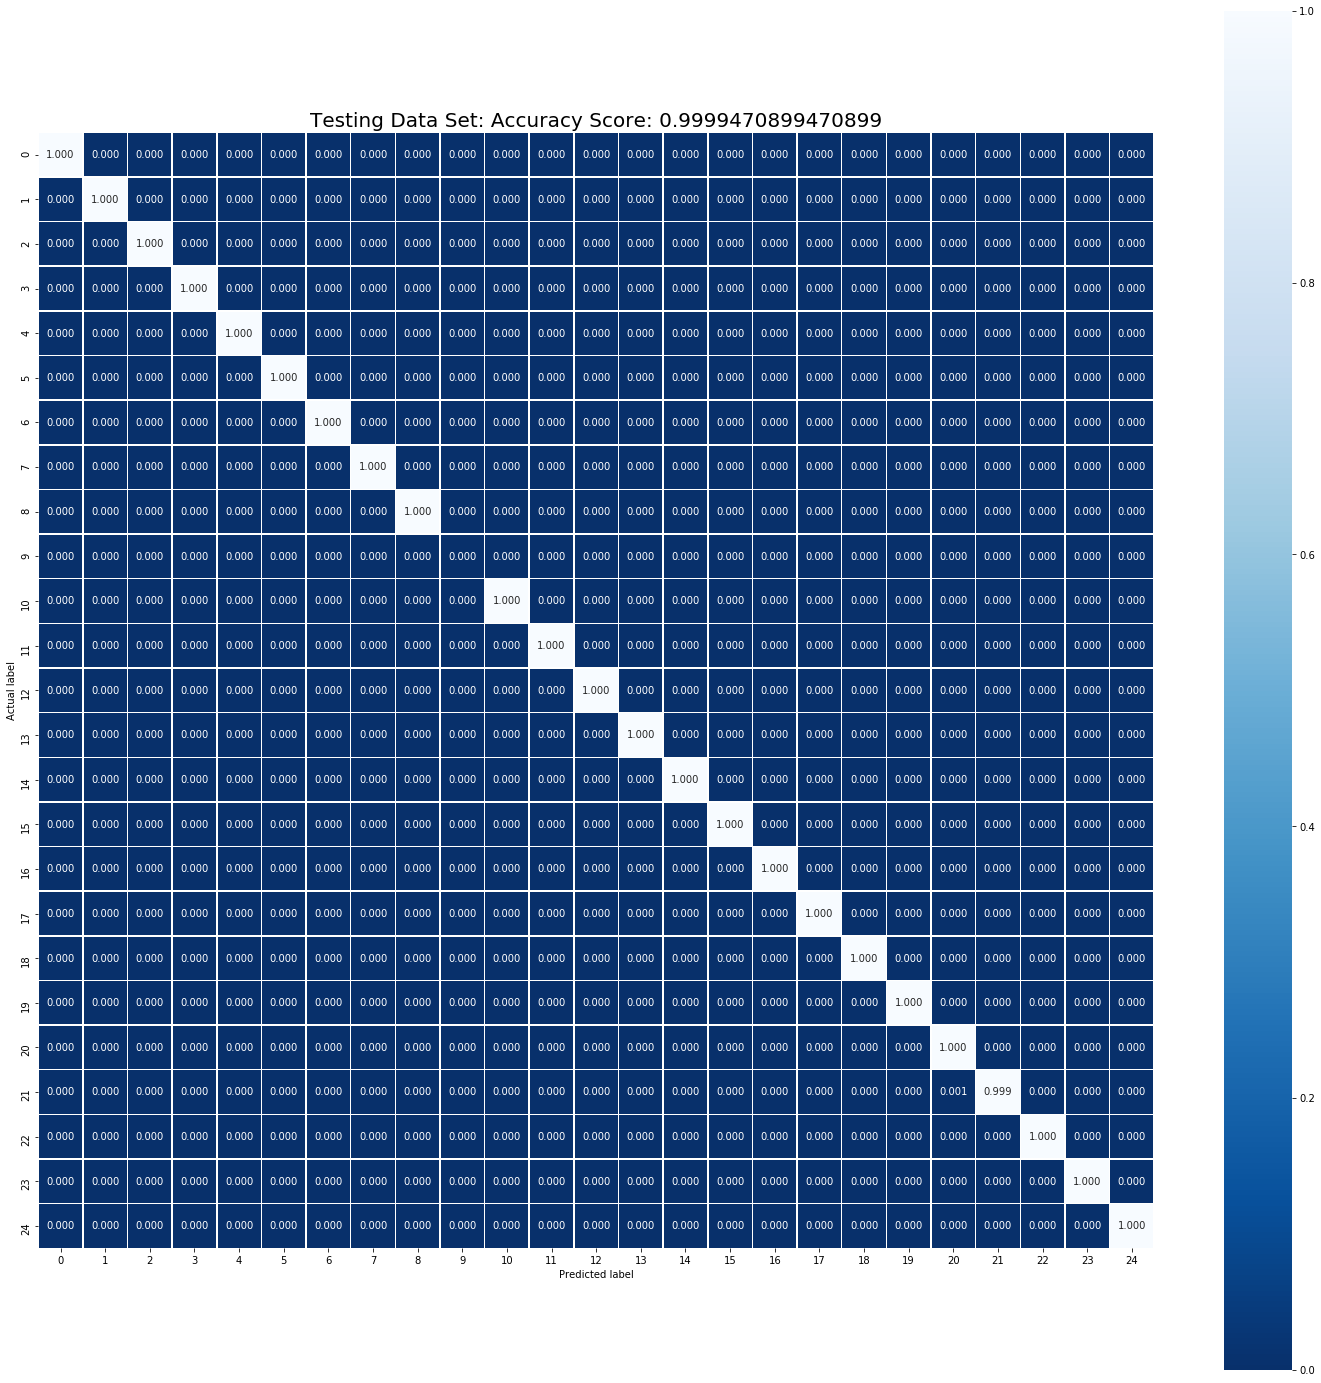

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
from sklearn import metrics

trainset, testset = GetLink()
train, test = GetData(trainset, testset)
X_train, Y_train = Transform(train)
X_test, Y_test = Transform(test)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.7, random_state=42)

def Start():
    option = input('Choose operation:\n1\tShow Image.\n2\tRun Logistic Regression.\nPress other key to exit!\nYour option: ') 
    while(option == '1' or option == '2'):
        if(option == '1'):
            ShowImage(train, 16)
        else:
            Regression()
        
        option = input('Choose operation:\n1\tShow Image.\n2\tRun Logistic Regression.\nPress other key to exit!\nYour option: ')

def GetLink():
    trainset = input('Training data set: ')
    testset = input('Testing data set: ')
    
    return trainset, testset

def GetData(trainset, testset):
    print('Importing data...')
    train = pd.read_csv(trainset)
    test = pd.read_csv(testset)
    
    print('Import completed!')
    
    return train, test

def ShowImage(data, index):
    label = data['label'].iloc[index]
    pictures = data.drop(['label'], axis = 1)
    picture = pictures.iloc[index].values.reshape(28, 28)

    plt.figure( figsize = (10, 10))
    plt.imshow(picture, cmap = plt.cm.gray)
    
    title = 'Label: ' + str(label)
    plt.title(title, size = 20)
    plt.show()
    
def Train(X, Y):
    print('Training data...')
    regression = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
    regression.fit(X, Y)
    print('Train completed')
    return regression
    
def Predict(regression, X):
    return regression.predict(X)
    
    
def ConfusionMatrix(regression, X, Y, Y_pred, title, norm):
    max_label = max(Y)
    score = regression.score(X, Y)
    cm = metrics.confusion_matrix(Y, Y_pred, labels=range(0, max_label + 1, 1), normalize = norm)
    
    plt.figure(figsize=(25,25))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = title + ': Accuracy Score: ' + str(score)
    plt.title(all_sample_title, size = 20);
    plt.show()
    
    
def Transform(data):
    Y = data.label
    X = data.drop(['label'], axis = 1)
    
    return X, Y
    
def Regression():
    regression = Train(X_train, Y_train)

    Y_pred = Predict(regression, X_train)
    ConfusionMatrix(regression, X_train, Y_train, Y_pred, "Training Data Set", 'true')

    Y_pred = Predict(regression, X_test)
    ConfusionMatrix(regression, X_test, Y_test, Y_pred, "Testing Data Set", 'true')
    
Start()
